In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
%load_ext google.colab.data_table

#Exploratory Data Analysis (EDA)

In [ ]:
dataset = pd.read_csv("/content/Breast_Cancer.csv")
X = dataset.iloc[1:, :-1].values
y = dataset.iloc[: , -1].values

In [ ]:
dataset.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [ ]:
X

,Sample code number,Clump Thickness,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,1000025,5,1,1,2,1,3,1,1
1,1002945,5,4,5,7,10,3,2,1
2,1015425,3,1,1,2,2,3,1,1
3,1016277,6,8,1,3,4,3,7,1
4,1017023,4,1,3,2,1,3,1,1
...,...,...,...,...,...,...,...,...,...
678,776715,3,1,1,3,2,1,1,1
679,841769,2,1,1,2,1,1,1,1
680,888820,5,10,3,7,3,8,10,2
681,897471,4,6,4,3,4,10,6,1


In [ ]:
y

0      2
1      2
2      2
3      2
4      2
      ..
678    2
679    2
680    4
681    4
682    4
Name: Class, Length: 683, dtype: int64

In [ ]:
dataset.shape

(683, 11)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Sample code number           683 non-null    int64
 1   Clump Thickness              683 non-null    int64
 2   Uniformity of Cell Size      683 non-null    int64
 3   Uniformity of Cell Shape     683 non-null    int64
 4   Marginal Adhesion            683 non-null    int64
 5   Single Epithelial Cell Size  683 non-null    int64
 6   Bare Nuclei                  683 non-null    int64
 7   Bland Chromatin              683 non-null    int64
 8   Normal Nucleoli              683 non-null    int64
 9   Mitoses                      683 non-null    int64
 10  Class                        683 non-null    int64
dtypes: int64(11)
memory usage: 58.8 KB


In [ ]:
dataset.describe()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [ ]:
dataset.isna().sum()
print(dataset.columns)

Index(['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class'],
      dtype='object')


##Outlier Analysis

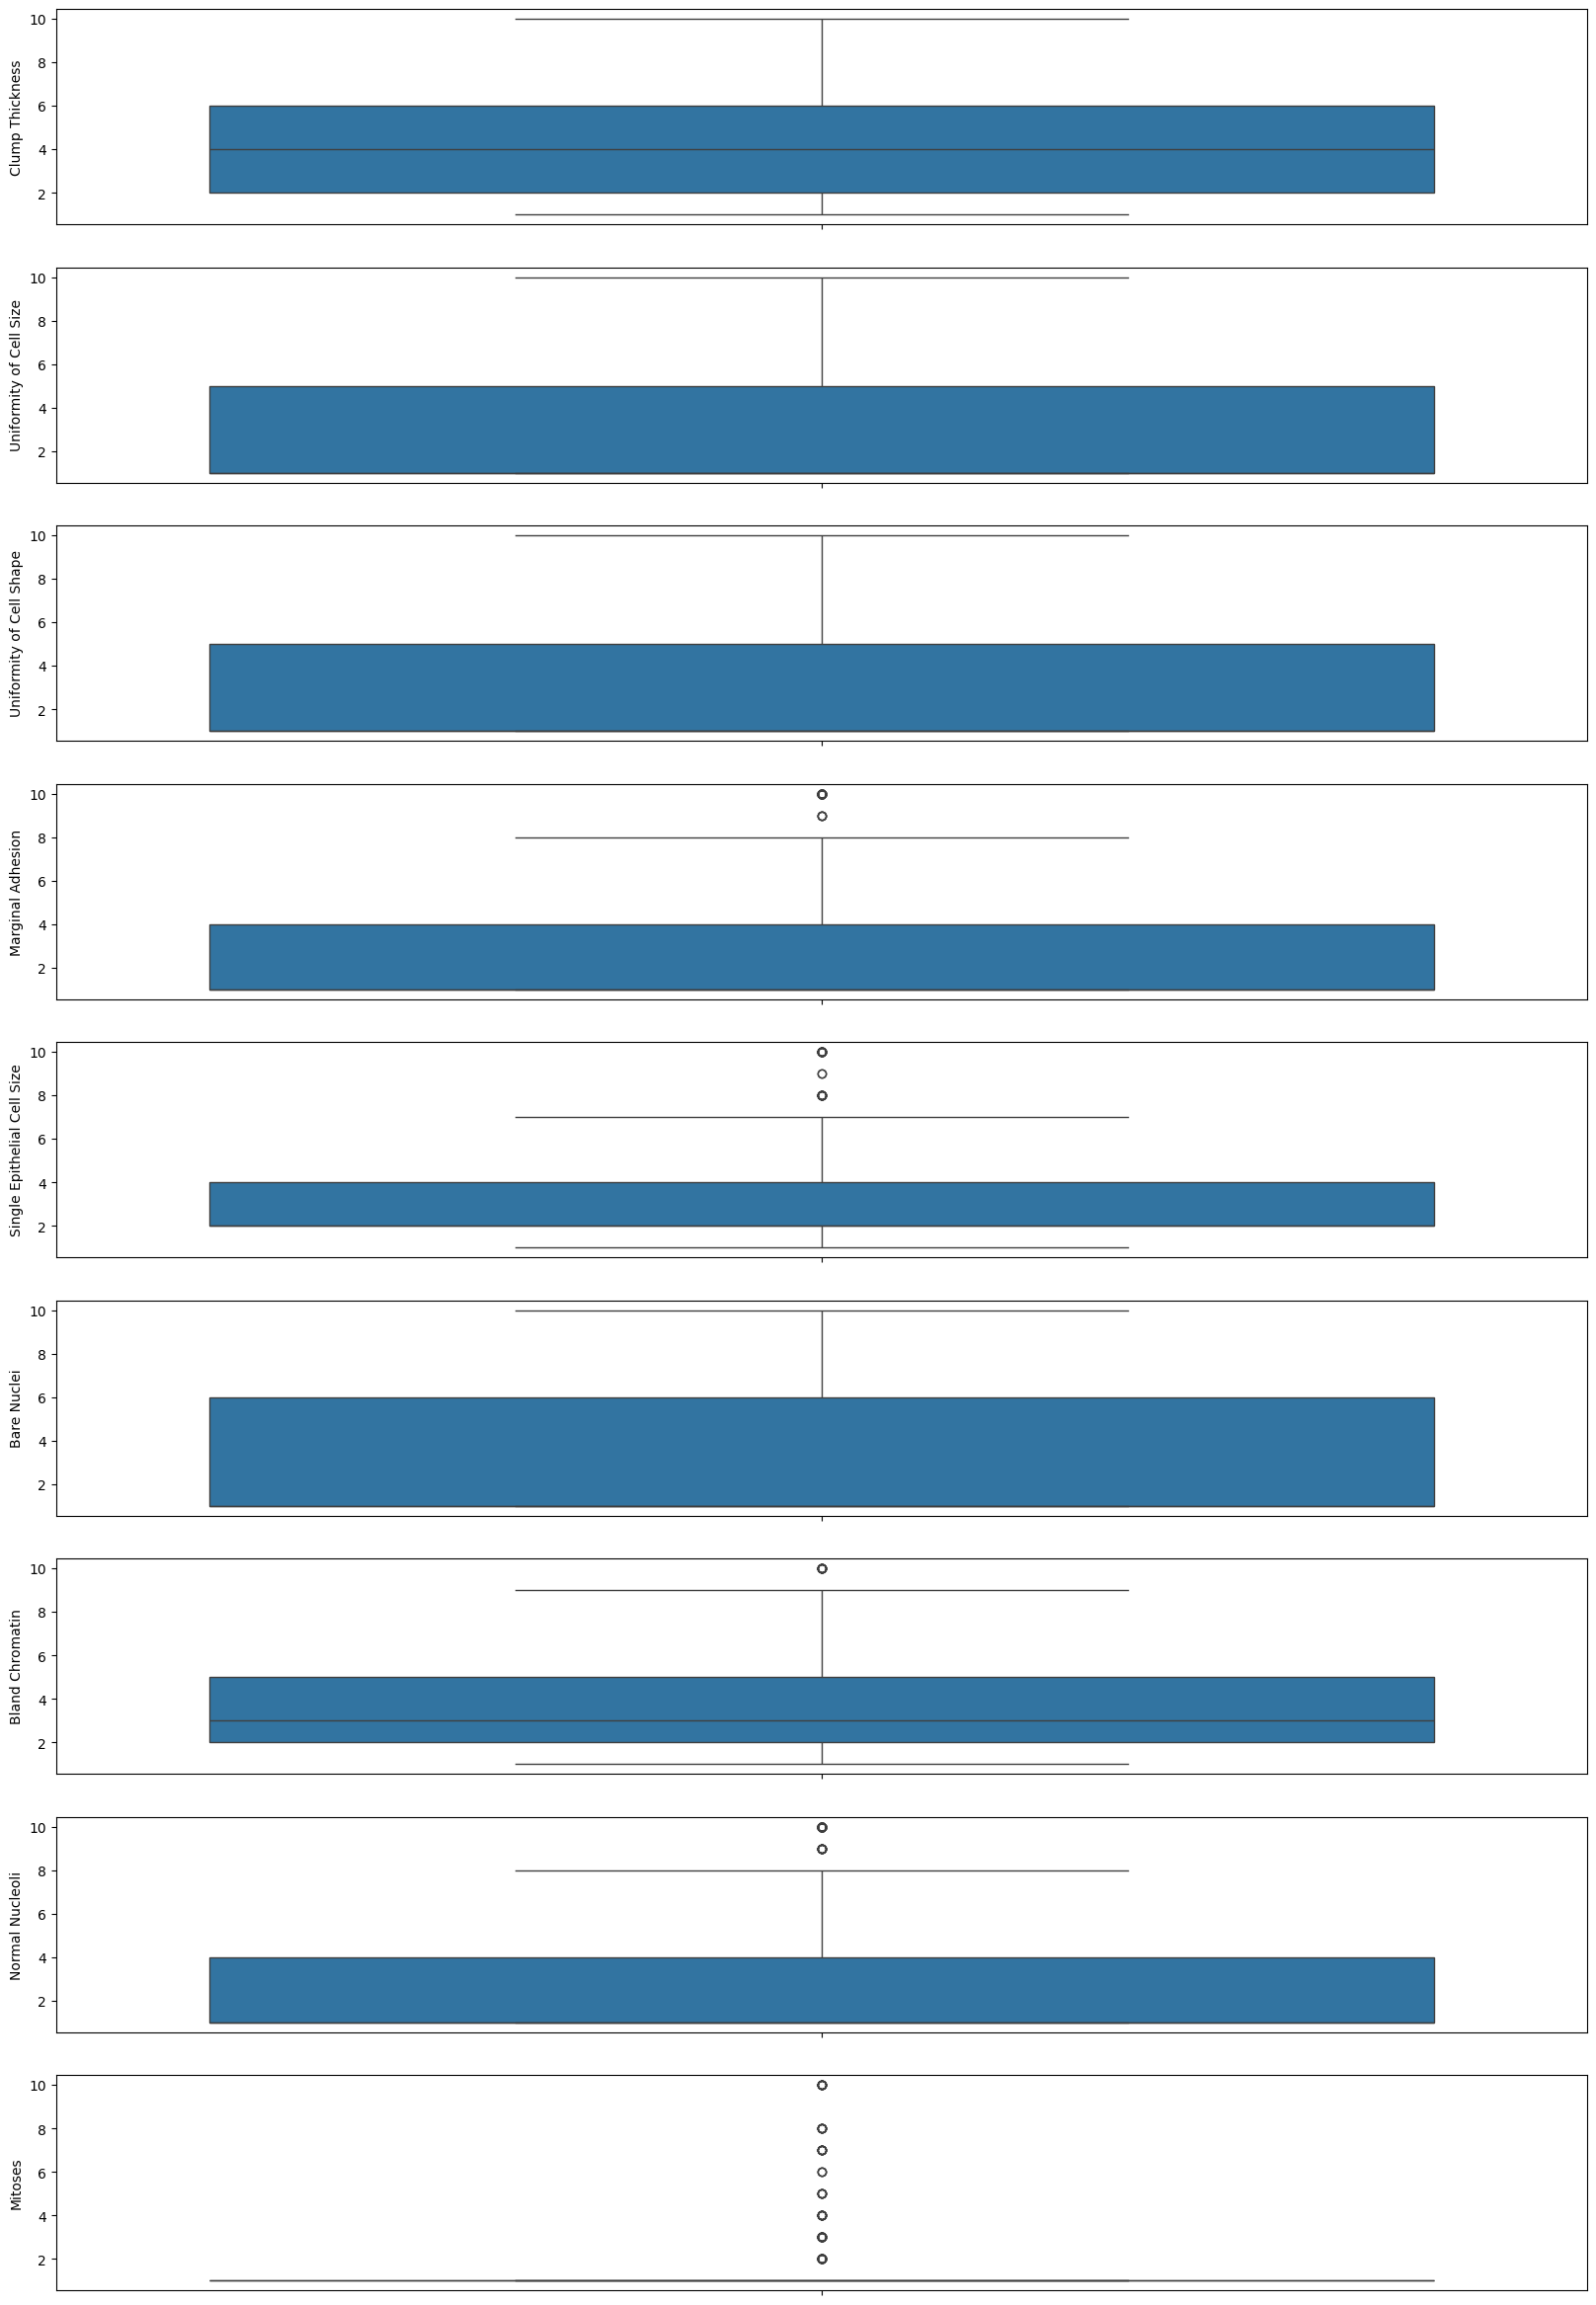

In [ ]:
fig,axs=plt.subplots(9,figsize=(20,30),facecolor = "white")
col = list(dataset.columns)[1:-1]
for count,i in enumerate(col):
  sns.boxplot(dataset[i],ax=axs[count])

##Visualizing Relation between Features

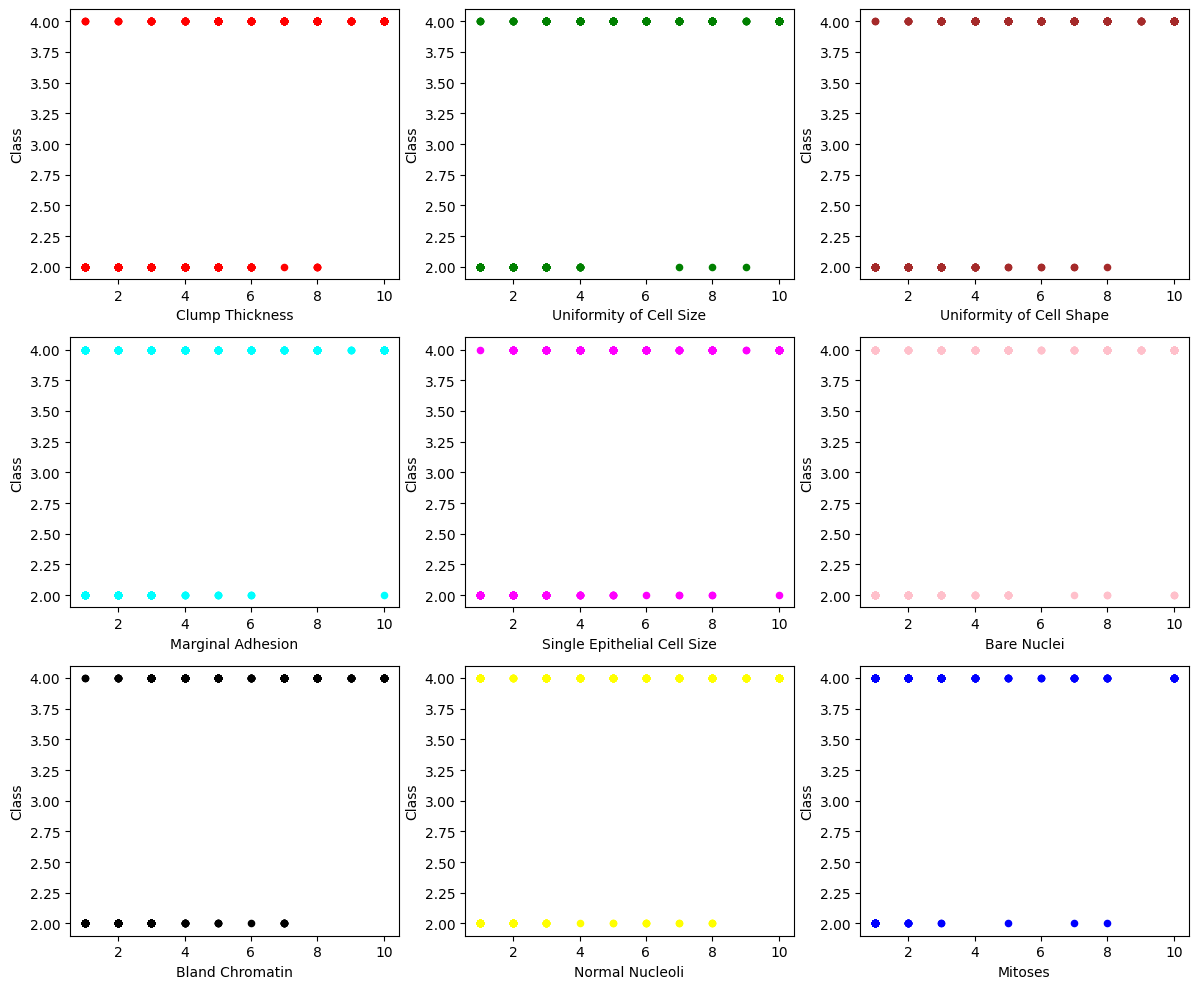

In [ ]:
fig,axs=plt.subplots(3,3,facecolor = 'white', figsize = (10,10))
count = 0
color = ['red','green','brown','cyan','magenta','pink','black','yellow','blue']
for i in axs:
  for j in i:
    dataset.plot(kind='scatter',x=col[count],y='Class',color=color[count],ax=j,figsize=(12,10))
    count+=1
fig.tight_layout()
plt.show()

##Visualising Correlation

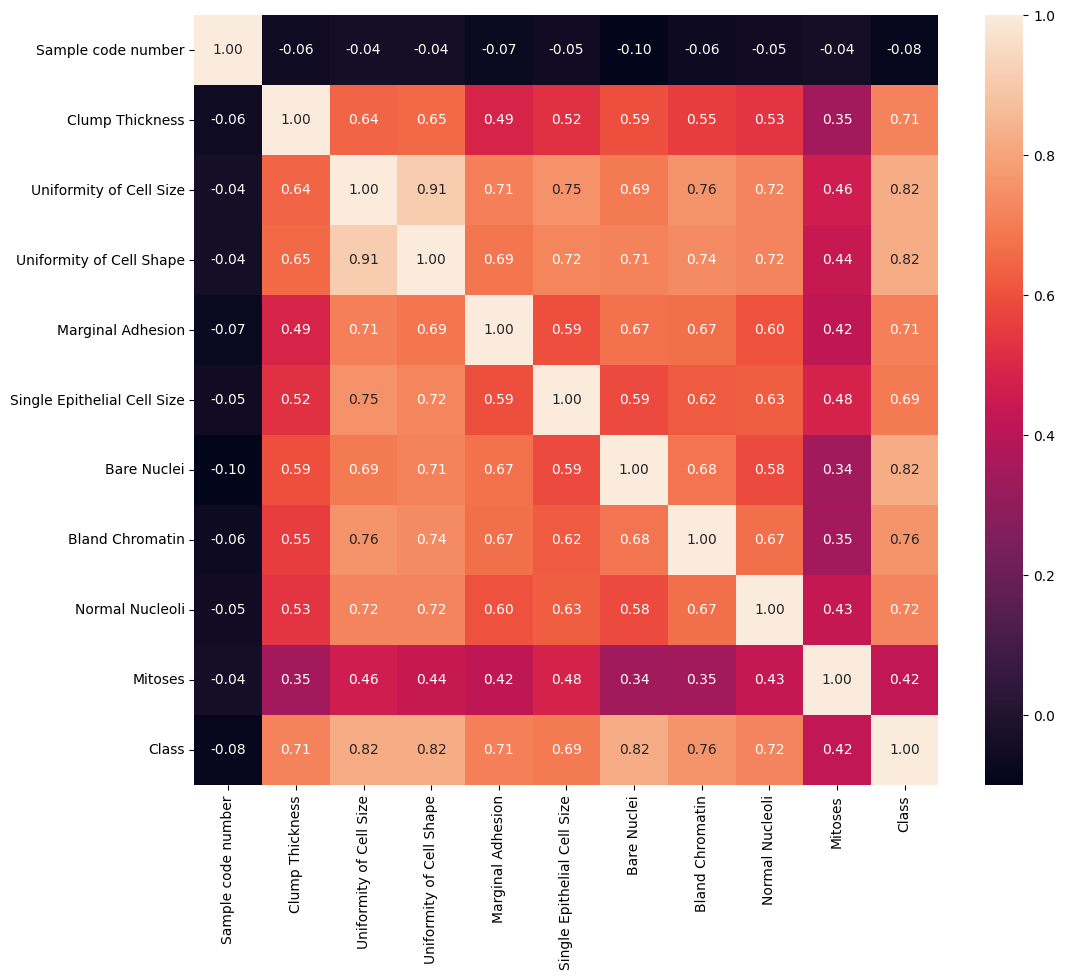

In [ ]:
corr = dataset.corr()
plt.figure(figsize = (12,10),facecolor = "white")
sns.heatmap(data = corr , annot = True, fmt = ".2f")
plt.show()

In [ ]:
dataset.drop(labels="Uniformity of Cell Size" , axis = 1, inplace=True)
dataset.head()

,Sample code number,Clump Thickness,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,2,1,3,1,1,2
1,1002945,5,4,5,7,10,3,2,1,2
2,1015425,3,1,1,2,2,3,1,1,2
3,1016277,6,8,1,3,4,3,7,1,2
4,1017023,4,1,3,2,1,3,1,1,2


In [ ]:
dataset["Class"].value_counts()

Class
2    444
4    239
Name: count, dtype: int64

#Visualizing Distribution of Features

<Figure size 1000x1000 with 0 Axes>

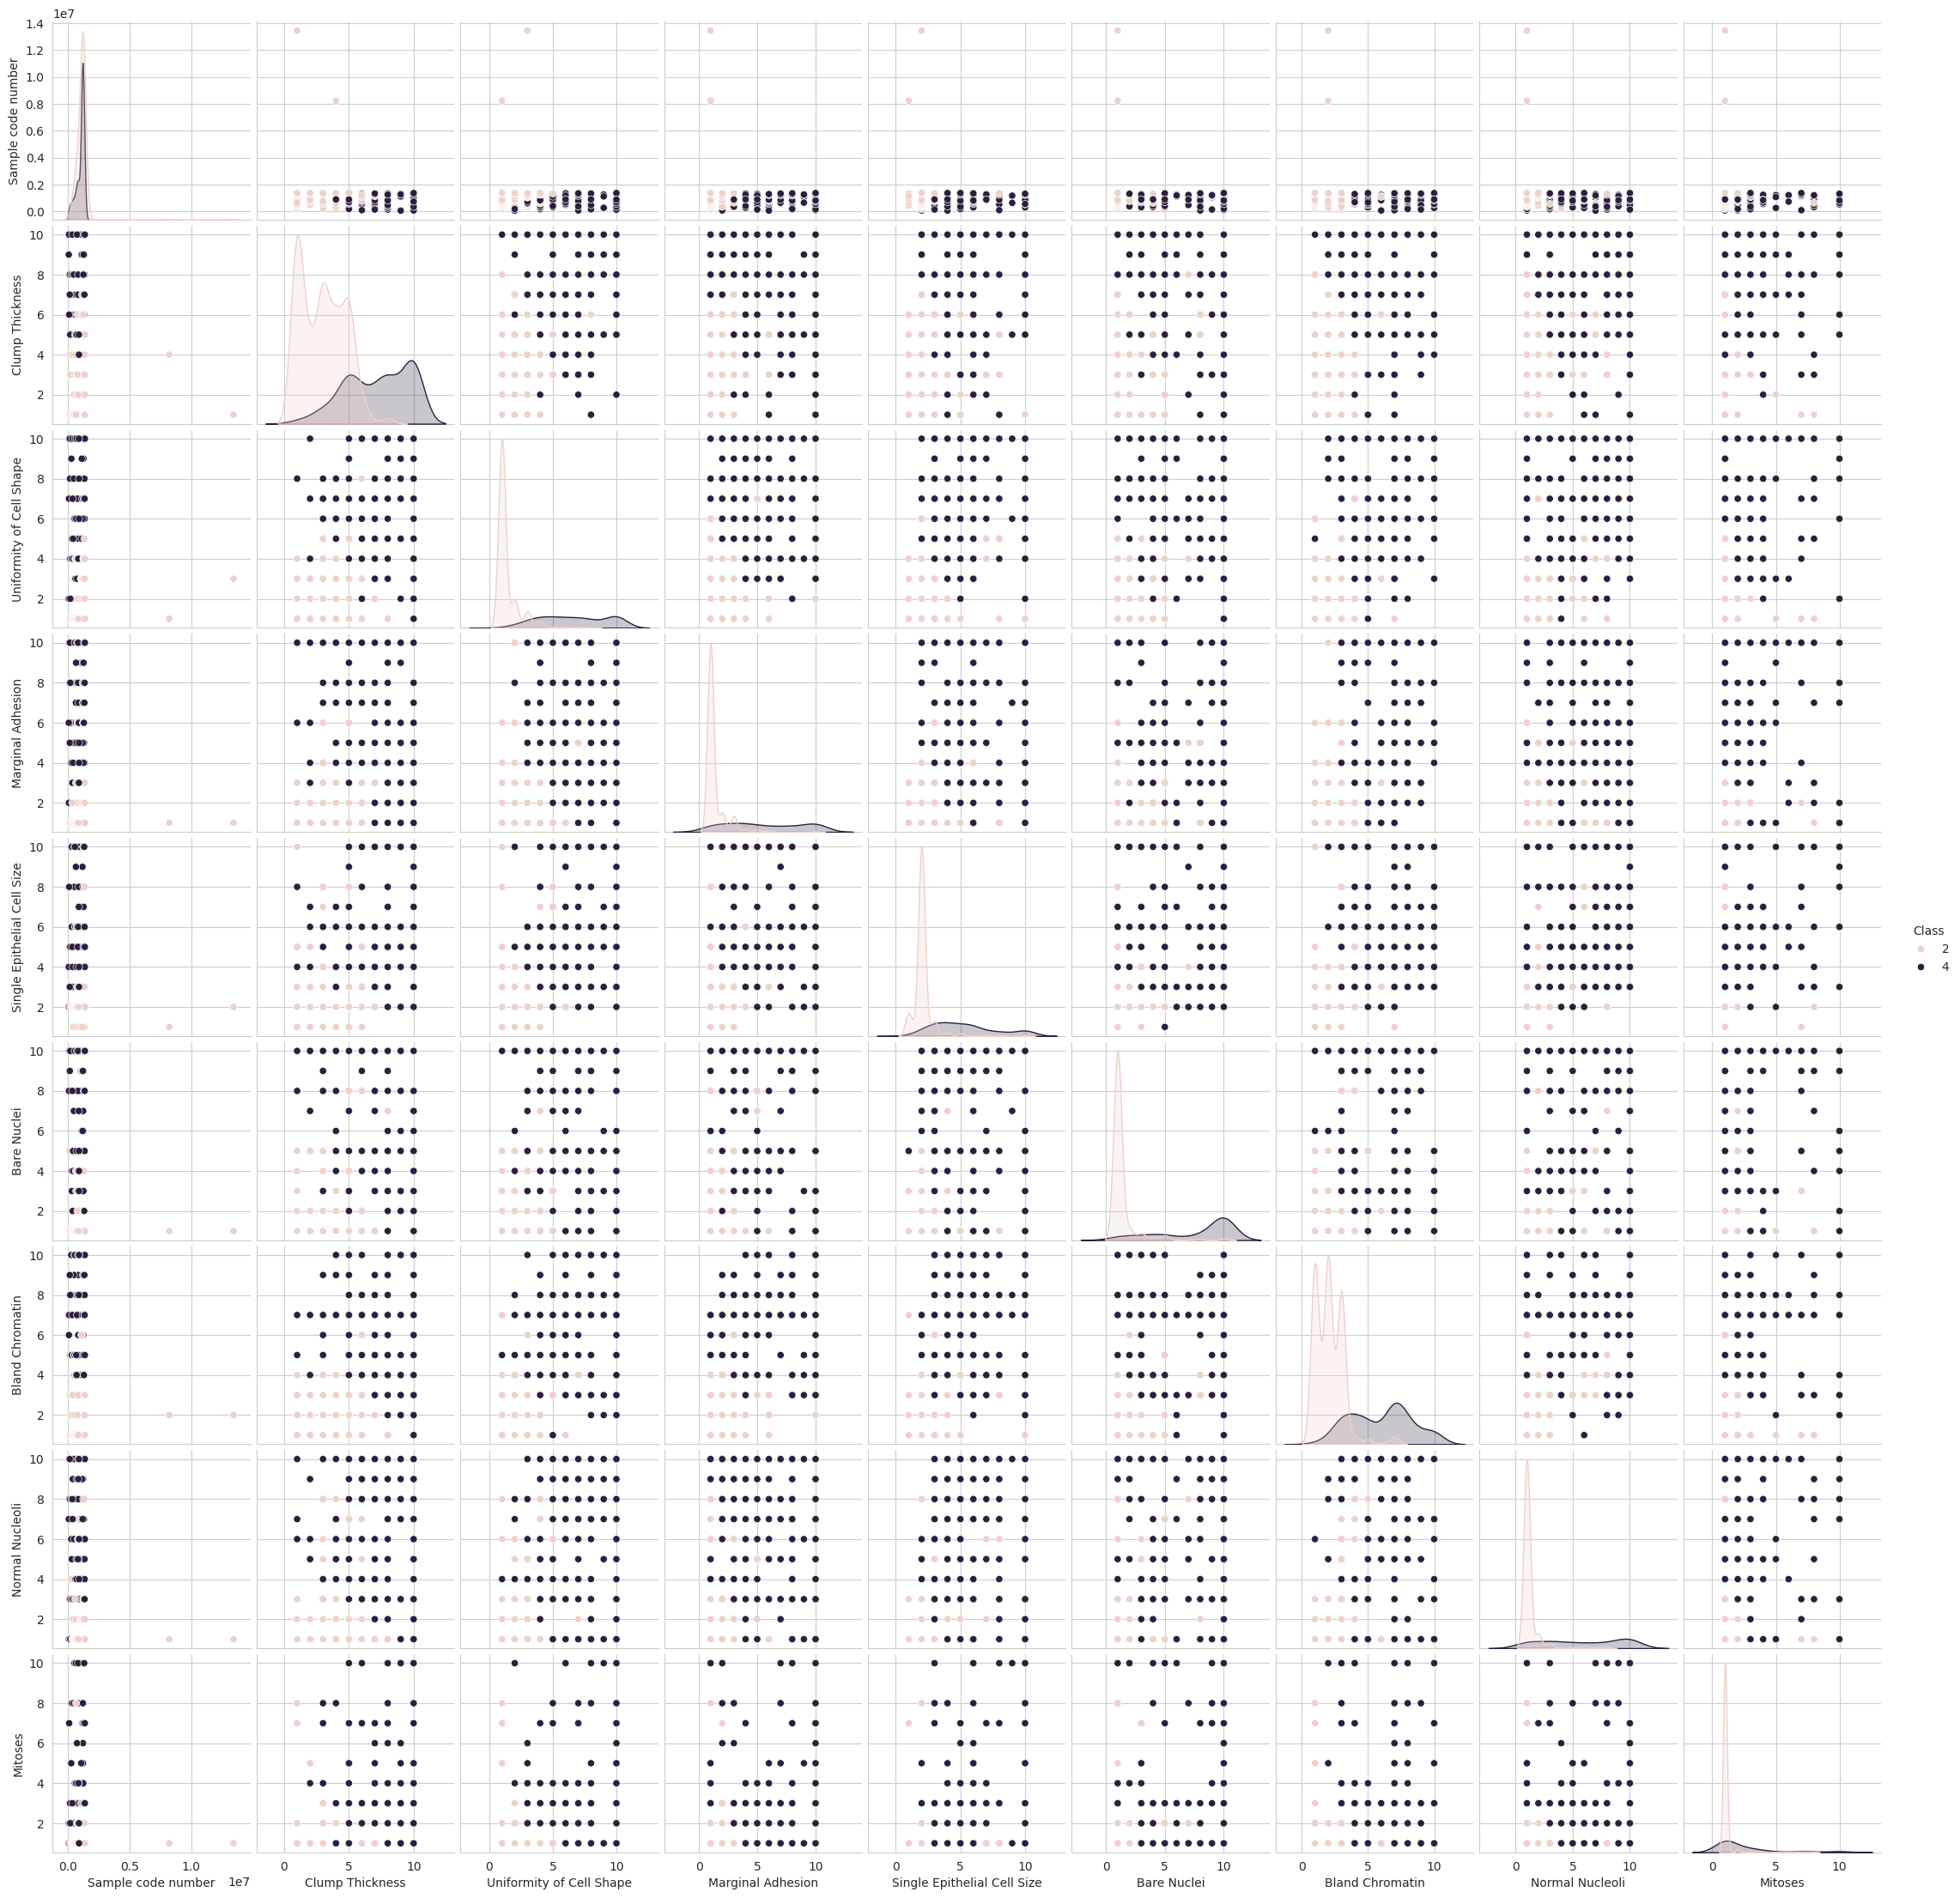

In [ ]:
#visualize distribution of features
plt.figure(figsize=(10, 10))
sns.set_style('whitegrid')
sns.pairplot(dataset, hue='Class')
plt.show()

#Feature Selection (By SelectKBest)

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

In [ ]:
X = dataset.drop('Class', axis=1)
y = dataset['Class']

In [ ]:
best_features = SelectKBest(score_func=f_classif, k=5)
fit = best_features.fit(X, y)

In [ ]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
feature_scores = pd.concat([dfcolumns,dfscores],axis=1)
feature_scores.columns = ['Feature','Score']
best_features = feature_scores.nlargest(5,'Score')['Feature'].values.tolist()

In [ ]:
X_best = dataset[best_features]
X_best.head()

,Bare Nuclei,Uniformity of Cell Shape,Bland Chromatin,Normal Nucleoli,Clump Thickness
0,1,1,3,1,5
1,10,4,3,2,5
2,2,1,3,1,3
3,4,8,3,7,6
4,1,1,3,1,4


In [ ]:
from scipy.stats.stats import pearsonr
out_list = []
for column in X.columns:
    corr_tuple = pearsonr(X[column], y)
    out_list.append([column, corr_tuple[0], corr_tuple[1]])

corr_df = pd.DataFrame(out_list, columns=["Features", "Correlation", "P-Value"])
corr_df.sort_values(by=['P-Value'], inplace=True)
corr_df
#pearsons correlation coeffiecent is calculated and correaltion with the target variable is seen

,Features,Correlation,P-Value
5,Bare Nuclei,0.822696,3.401103e-169
2,Uniformity of Cell Shape,0.821891,1.369425e-168
6,Bland Chromatin,0.758228,1.267712e-128
7,Normal Nucleoli,0.718677,1.465645e-109
1,Clump Thickness,0.714790,7.292504e-108
3,Marginal Adhesion,0.706294,2.979778e-104
4,Single Epithelial Cell Size,0.690958,4.733540e-98
8,Mitoses,0.423448,4.304040e-31
0,Sample code number,-0.084701,2.686156e-02


#Cross Validation

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

##First Method

In [ ]:
from sklearn.model_selection import StratifiedKFold
scores = []
skf = StratifiedKFold(n_splits = 5, random_state = 0, shuffle = True)
for train_index, test_index in skf.split(X_best,y):
  X_train,X_test,y_train,y_test = X_best.iloc[train_index], X_best.iloc[test_index], y[train_index], y[test_index]
  clf = KNeighborsClassifier(n_neighbors = 5)
  clf.fit(X_train, y_train)
  scores.append(clf.score(X_train, y_train))
scores = np.array(scores)
print(scores.mean())

0.9754766257508487


##Second Method

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator = KNeighborsClassifier(n_neighbors = 5), X = X_best, y = y)
scores.mean()

0.9663589523400601

#Training the Model and Prediction

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_best, y , test_size = 0.2, random_state = 0)
X_train.shape , X_test.shape, y_train.shape, y_test.shape

((546, 5), (137, 5), (546,), (137,))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train , y_train)

KNeighborsClassifier()

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
print(pd.Series(y_pred).value_counts())
print(pd.Series(y_test).value_counts())

2    85
4    52
Name: count, dtype: int64
Class
2    87
4    50
Name: count, dtype: int64


#Performance Metrics

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

##Classification Report

In [ ]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           2       0.99      0.97      0.98        87
           4       0.94      0.98      0.96        50

    accuracy                           0.97       137
   macro avg       0.97      0.97      0.97       137
weighted avg       0.97      0.97      0.97       137



##Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test , y_pred)

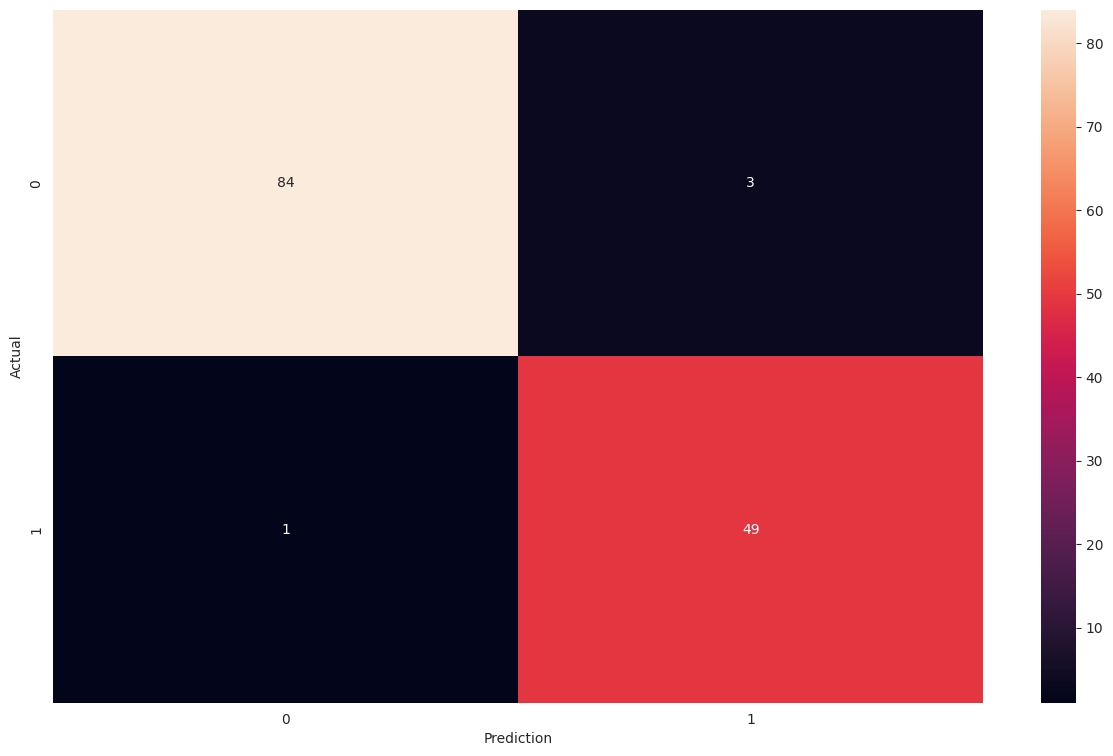

True Negative:  84
False Negative:  1
True Positive:  49
False Positive:  3


In [ ]:
plt.figure(figsize=(15,9), facecolor='white')
sns.heatmap(confusion_matrix, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

print("True Negative: ", confusion_matrix[0][0])
print("False Negative: ", confusion_matrix[1][0])
print("True Positive: ", confusion_matrix[1][1])
print("False Positive: ", confusion_matrix[0][1])

##Accuracy Score

In [ ]:
print(accuracy_score(y_test, y_pred))

0.9708029197080292
